# Preliminaries, requirements, imports, ...

In [1]:
import matplotlib.pyplot as plt
import json

from tqdm.auto import tqdm

from video_handler import read_video_as_numpy

from decomposition import *
from rsvd import *
from util import decomposition_results_to_json
from visualization import error_time_analysis


plt.rcParams['figure.figsize'] = [16,6]
plt.rcParams.update({'font.size': 18})

# Reading Video 

In [2]:
n_frames = 60
colorful = True
file_name = "flowers"
input_folder = "../videos/input"
input_video_path =  input_folder + "/" + file_name + ".mp4"
exp_name = f"{file_name}{n_frames}{'' if colorful else '_gray'}"
fps = 20
format_ = "mp4v"

In [3]:
video_tensor = read_video_as_numpy(input_video_path, n_frames, colorful)

Reading first 60 frames from ../videos/input/flowers.mp4:   0%|          | 0/60 [00:00<?, ?it/s]

Shape of read tensor = (60, 674, 1280, 3)


# Slicing + RSVD 

In [ ]:
results_rsvd = dict()
for comp_ratio in [50, 25, 10, 5, 3]:
    print(f"===== COMPRESSION RATIO = {comp_ratio} =====")
    results_rsvd[comp_ratio] = all_dim_RSVD(exp_name=exp_name+f"_compress_{comp_ratio}",
                                            video_tensor=video_tensor,
                                            desired_compression_ratio=comp_ratio,
                                            format_=format_,
                                            fps=fps,
                                            colorful=colorful,
                                            delete_prev=True,
                                            save=True)
decomposition_results_to_json(exp_name, "RSVD", results_rsvd)

# Tensor methods

## Tensorly Tucker

In [ ]:
results_tucker = dict()
for comp_ratio in [50_000, 25_000, 10_000, 5_000, 2_500, 1_000, 500, 250, 100, 50, 25, 10, 5, 3]:
    print(f"===== COMPRESSION RATIO = {comp_ratio} =====")
    results_tucker[comp_ratio] = decomposition(exp_name+f"_compress_{comp_ratio}", video_tensor,
                                                        "Tucker", {"tol": 1e-6, "n_iter_max": 100},
                                                        desired_comp_ratio=comp_ratio,
                                                        format_=format_,
                                                        fps=fps,
                                                        colorful=colorful,
                                                        delete_prev=True)
decomposition_results_to_json(exp_name, "Tucker", results_tucker)

## Tensorly CP

In [ ]:
results_cp = dict()
for comp_ratio in [50_000, 25_000, 10_000, 5_000, 2_500, 1_000]:
    print(f"===== COMPRESSION RATIO = {comp_ratio} =====")
    results_cp[comp_ratio] = decomposition(exp_name+f"_compress_{comp_ratio}", video_tensor,
                                                        "CP", {"tol": 1e-9, "n_iter_max": 100, "n_samples": 5_000},
                                                        desired_comp_ratio=comp_ratio,
                                                        format_=format_,
                                                        fps=fps,
                                                        colorful=colorful,
                                                        delete_prev=True)
decomposition_results_to_json(exp_name, "CP", results_cp)

## Tensorly Non-Negative Tucker

In [ ]:
"""
if (video_tensor >= 0).all():
    results_non_neg_tucker = dict()
    for comp_ratio in [1000, 500, 250, 100]:
        print(f"===== COMPRESSION RATIO = {comp_ratio} =====")
        results_non_neg_tucker[comp_ratio] = decomposition_tucker(exp_name+f"_compress_{comp_ratio}", video_tensor,
                                                            "NonNegTucker", {"tol": 1e-6, "n_iter_max": 100},
                                                            desired_comp_ratio=comp_ratio,
                                                            format_=format_,
                                                            fps=fps,
                                                            colorful=colorful,
                                                            delete_prev=True)
"""

## Pyttb Tucker ALS

In [ ]:
"""
results_tucker_ALS = dict()
for comp_ratio in [2, 3, 5, 10, 25, 50]:
    print(f"===== COMPRESSION RATIO = {comp_ratio} =====")
    results_tucker_ALS[comp_ratio] = decomposition_tucker(exp_name+f"_compress_{comp_ratio}", video_tensor, "TuckerALS", {"tol": 1e-3},
                                                desired_comp_ratio=comp_ratio,
                                                format_=format_,
                                                fps=fps,
                                                colorful=colorful,
                                                delete_prev=True)

decomposition_results_to_json(exp_name, "TuckerALS", results_tucker_ALS)
"""

## Pyttb HOSVD

In [ ]:
results_hosvd = dict()
for comp_ratio in [50_000, 25_000, 10_000, 5_000, 2_500, 1_000, 500, 250, 100, 50, 25, 10, 5, 3]:
    print(f"===== COMPRESSION RATIO = {comp_ratio} =====")
    results_hosvd[comp_ratio] = decomposition(exp_name+f"_compress_{comp_ratio}", video_tensor, "HOSVD", {"tol": 1e-6},
                                                desired_comp_ratio=comp_ratio,
                                                format_=format_,
                                                fps=fps,
                                                colorful=colorful,
                                                delete_prev=True)
    
decomposition_results_to_json(exp_name, "HOSVD", results_hosvd)

# Time and Error Analysis

                                                          flowers60                                                          


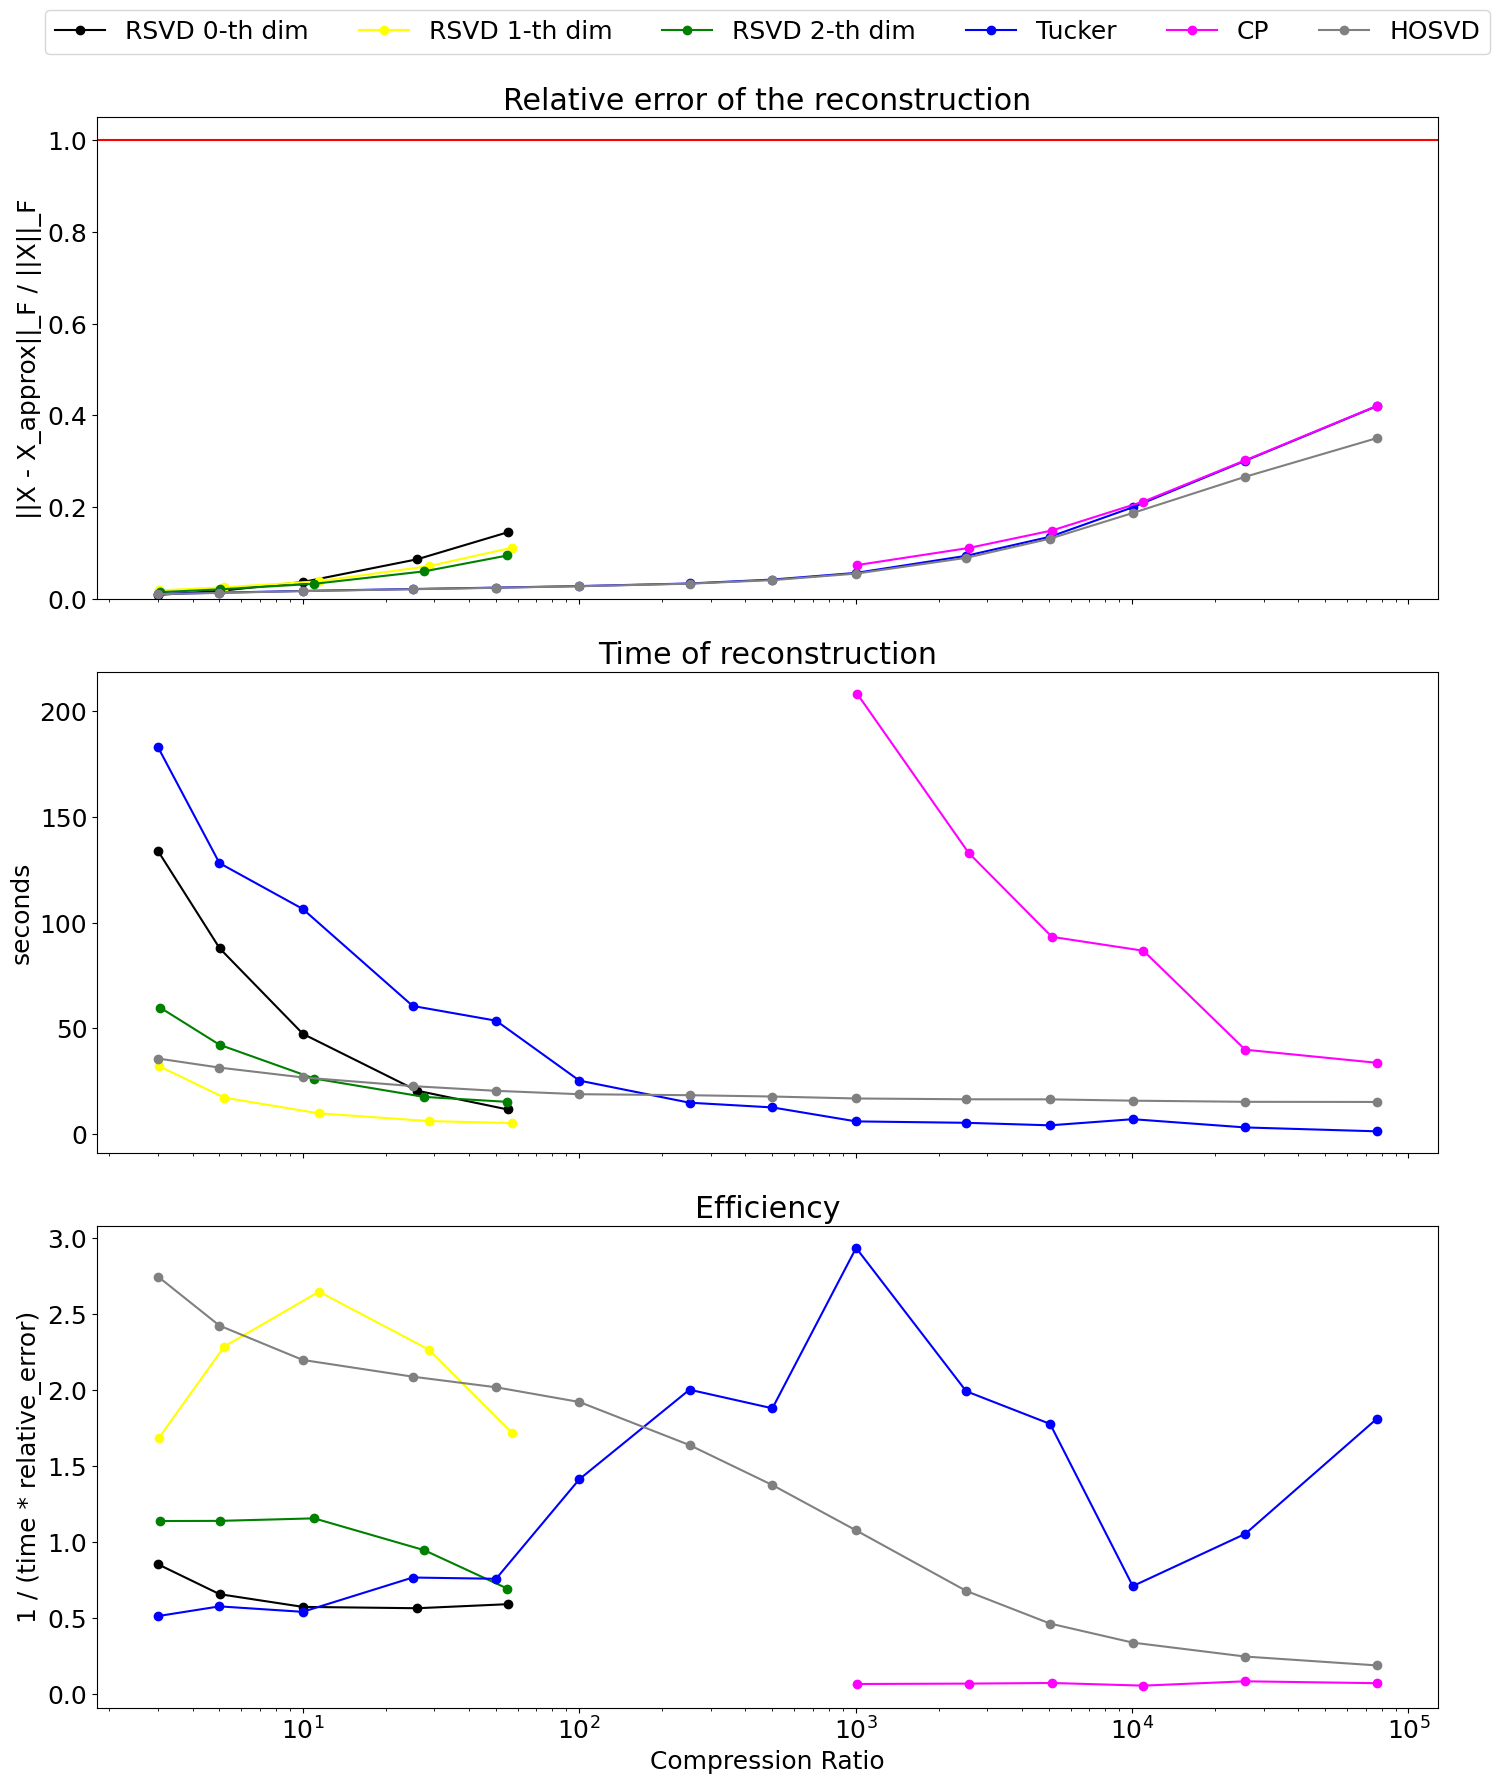

In [4]:
all_results = dict()

for method in ['RSVD', 'Tucker', 'CP', 'HOSVD']:
    with open(f"../jsons/{method}_{exp_name}.json", "r") as openfile:
        all_results[method] = json.load(openfile)

print(f"{exp_name: ^125}")
relative_errors, times, efficiency = error_time_analysis(exp_name, all_results)